In [1]:
#!pip install pandas
#!pip install matplotlib.pyplot 
#!pip install scikit-learn
#!pip install sklearn.prepocessing 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'D:\diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory data analysis

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

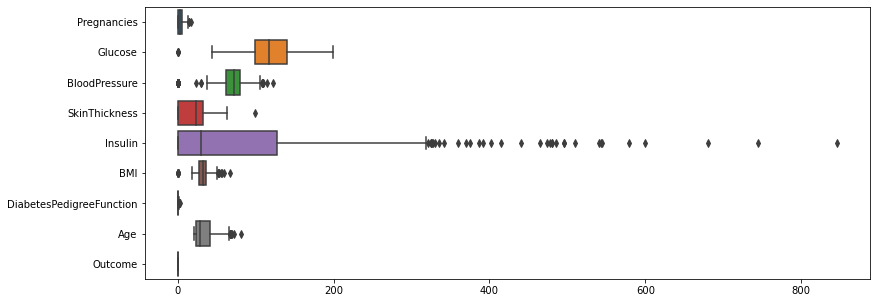

In [9]:
plt.figure(figsize=(13,5))
sns.boxplot(data=df,orient='h')
plt.show()

<AxesSubplot:xlabel='Insulin', ylabel='Outcome'>

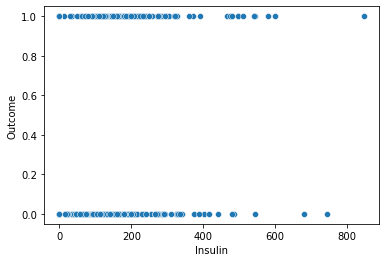

In [10]:
sns.scatterplot(x=df['Insulin'],y=df['Outcome'])

<AxesSubplot:>

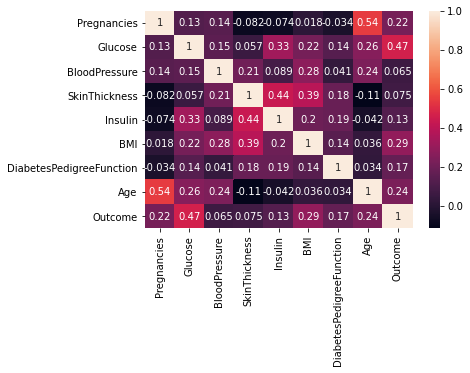

In [11]:

corr_mat=df.corr()
sns.heatmap(corr_mat, annot=True)


# replacing 0 

In [12]:
X=df.drop('Outcome',axis=1)

In [13]:
Y=df['Outcome']

In [14]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [15]:
X.replace(to_replace=0,value=df.mean(),inplace=True)

In [16]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

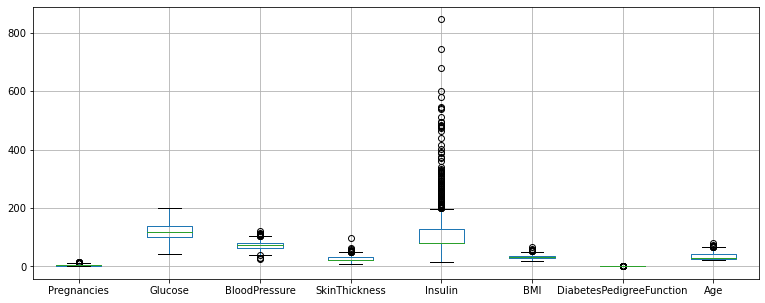

In [17]:
X.boxplot(figsize=(13,5)) 

# Exploring data

In [18]:
import seaborn as sns

Text(0.5, 1.0, 'Glucose')

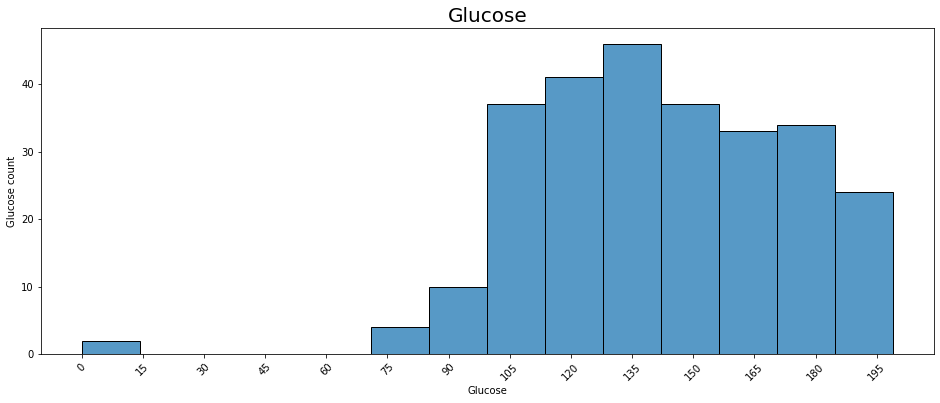

In [19]:
#glucose for diabetic
fig = plt.figure(figsize =(16,6))

sns.histplot(df["Glucose"][df["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

Text(0.5, 1.0, 'Insulin')

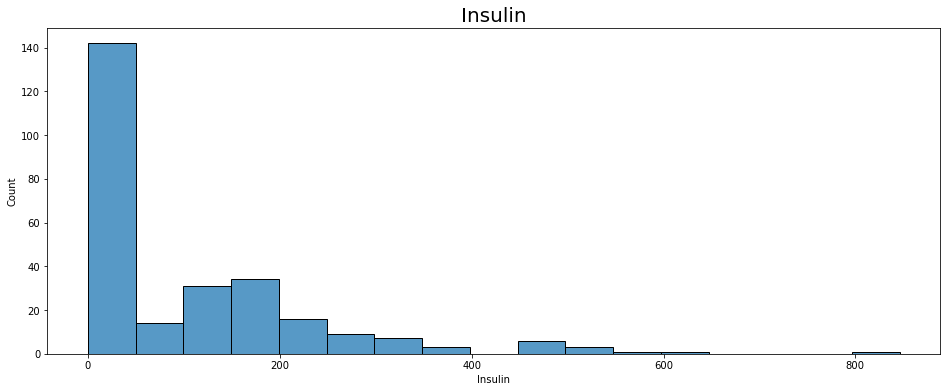

In [20]:
#insulin for diabetic 

fig = plt.figure(figsize = (16,6))

sns.histplot(df["Insulin"][df["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize = 20)

Text(0.5, 1.0, 'diabetespedigreefunction')

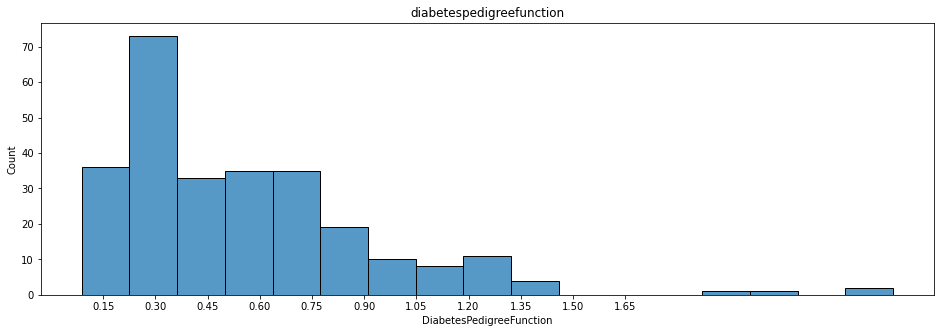

In [21]:
#diabeticpedigreefunction for diabetic
fig = plt.figure(figsize = (16,5))
sns.histplot(df["DiabetesPedigreeFunction"][df["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("diabetespedigreefunction")

Text(0.5, 1.0, 'Age')

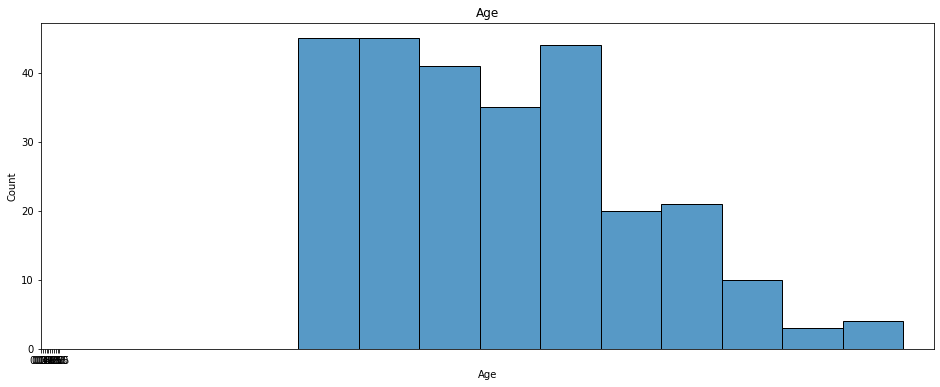

In [22]:
#Age for diabetic
fig = plt.figure(figsize = (16,6))

sns.histplot(df["Age"][df["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Age")

# splitting of data for training and testing 

In [23]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [24]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train , X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=25)


In [27]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
584,8.000000,124.0,76.0,24.000000,600.000000,28.7,0.687,52
237,3.845052,179.0,90.0,27.000000,79.799479,44.1,0.686,23
715,7.000000,187.0,50.0,33.000000,392.000000,33.9,0.826,34
758,1.000000,106.0,76.0,20.536458,79.799479,37.5,0.197,26
189,5.000000,139.0,80.0,35.000000,160.000000,31.6,0.361,25
...,...,...,...,...,...,...,...,...
317,3.000000,182.0,74.0,20.536458,79.799479,30.5,0.345,29
143,10.000000,108.0,66.0,20.536458,79.799479,32.4,0.272,42
474,4.000000,114.0,64.0,20.536458,79.799479,28.9,0.126,24
318,3.000000,115.0,66.0,39.000000,140.000000,38.1,0.150,28


In [28]:
Y_train

584    1
237    1
715    1
758    0
189    1
      ..
317    1
143    1
474    0
318    0
132    1
Name: Outcome, Length: 537, dtype: int64

# standard scaler

In [29]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [30]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [31]:
X_train_std

array([[ 1.21940301,  0.04193333,  0.27734426, ..., -0.53084385,
         0.6259847 ,  1.59136025],
       [-0.17485054,  1.82800441,  1.4549702 , ...,  1.72036006,
         0.62305622, -0.90433494],
       [ 0.88383838,  2.08779657, -1.90967535, ...,  0.22930292,
         1.03304271,  0.04230807],
       ...,
       [-0.1228555 , -0.28280687, -0.73204941, ..., -0.50160744,
        -1.01688975, -0.81827648],
       [-0.45842013, -0.25033285, -0.56381713, ...,  0.84326762,
        -0.94660635, -0.47404266],
       [-0.45842013,  1.53573823, -0.73204941, ...,  0.31701216,
        -0.34334051, -0.30192575]])

# Train our Model

# LOGISTIC REGRESSION

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [33]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [34]:
Y_pred=lr.predict(X_test_std)

In [35]:
Y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [36]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
459,9.000000,134.0,74.0,33.000000,60.000000,25.9,0.460,81
39,4.000000,111.0,72.0,47.000000,207.000000,37.1,1.390,56
344,8.000000,95.0,72.0,20.536458,79.799479,36.8,0.485,57
84,5.000000,137.0,108.0,20.536458,79.799479,48.8,0.227,37
700,2.000000,122.0,76.0,27.000000,200.000000,35.9,0.483,26
...,...,...,...,...,...,...,...,...
288,4.000000,96.0,56.0,17.000000,49.000000,20.8,0.340,26
438,1.000000,97.0,70.0,15.000000,79.799479,18.2,0.147,21
660,10.000000,162.0,84.0,20.536458,79.799479,27.7,0.182,54
379,3.845052,93.0,100.0,39.000000,72.000000,43.4,1.021,35


In [37]:
Y_test

459    0
39     1
344    0
84     1
700    0
      ..
288    0
438    0
660    0
379    0
594    0
Name: Outcome, Length: 231, dtype: int64

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(Y_test,Y_pred)

0.8138528138528138

# DECISION TREE

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [41]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [42]:

Y_pred=dt.predict(X_test_std)

In [43]:
Y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:

Y_test

459    0
39     1
344    0
84     1
700    0
      ..
288    0
438    0
660    0
379    0
594    0
Name: Outcome, Length: 231, dtype: int64

In [45]:

accuracy_score(Y_test,Y_pred)

0.6883116883116883

# DEEP LEARNING

In [46]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(8,8))

In [48]:
mlp.fit(X_train_std,Y_train)

C:\Users\Mohana\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8))

In [49]:

Y_pred=mlp.predict(X_test_std)

In [50]:
accuracy_score(Y_test,Y_pred)

0.7705627705627706

In [3]:
import pandas as pd
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 2cb96529396d93b46abab7bbc73a208e708c642e
python           : 3.8.8.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_India.1252

pandas           : 1.2.4
numpy            : 1.20.1
pytz             : 2021.1
dateutil         : 2.8.1
pip              : 21.0.1
setuptools       : 52.0.0.post20210125
Cython           : 0.29.23
pytest           : 6.2.3
hypothesis       : None
sphinx           : 4.0.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.8
lxml.etree       : 4.6.3
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.8.5 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 7.22.0
pandas_datareader: None
bs4              : 4.